<h1>Bucketing time</h1>

In NYC there's a number that you can dial, 311, for a complaints hotline to make complaints about all kinds of things (potholes, bus delays, taxi, heat, noise, etc.) 

These complaints are all recorded and stored, and NYC has a very nice data delivery service. Almost any kind of data NYC produces is made available to the public.

The file **sample_data.csv** contains start and processing times for all complaints registered with NYC's 311 complaint hotline on 01/01/2016. Our goal is to compute the average processing time for each hourly bucket.

<h3>Step 1: Read the data</h3>

In [10]:
nyc = list()
with open('nyc.csv','r') as f:
    for line in f:
        nyc.append(line.strip().split(','))

In [11]:
# inspect 1st 10 lines
nyc[0:10]

[['2016-01-01 00:00:09', '0.0815162037037037'],
 ['2016-01-01 00:00:40', '0.1334837962962963'],
 ['2016-01-01 00:01:09', '20.388726851851853'],
 ['2016-01-01 00:02:59', '0.9811458333333334'],
 ['2016-01-01 00:03:03', '7.048576388888889'],
 ['2016-01-01 00:03:03', '0.1400810185185185'],
 ['2016-01-01 00:03:29', '0.11086805555555555'],
 ['2016-01-01 00:04:06', '0.016967592592592593'],
 ['2016-01-01 00:04:37', '0.1597222222222222'],
 ['2016-01-01 00:04:56', '2.996585648148148']]

So we have a tuple (list), where element 1 is a string that looks like a datetime, and element 2 is a string that looks like a float

In [7]:
# convert test
import datetime

x = '2016-01-01 00:00:09'
format_str = "%Y-%m-%d %H:%M:%S"

datetime.datetime.strptime(x,format_str)

datetime.datetime(2016, 1, 1, 0, 0, 9)

In [12]:
# for each tuple in our list, convert 1st element to a datetime and the second to a float
for i in range(0,len(nyc)):
    nyc[i][0] = datetime.datetime.strptime(nyc[i][0],"%Y-%m-%d %H:%M:%S")
    nyc[i][1] = float(nyc[i][1])

In [13]:
#Let's see if this worked
nyc[0:10]

[[datetime.datetime(2016, 1, 1, 0, 0, 9), 0.0815162037037037],
 [datetime.datetime(2016, 1, 1, 0, 0, 40), 0.1334837962962963],
 [datetime.datetime(2016, 1, 1, 0, 1, 9), 20.388726851851853],
 [datetime.datetime(2016, 1, 1, 0, 2, 59), 0.9811458333333334],
 [datetime.datetime(2016, 1, 1, 0, 3, 3), 7.048576388888889],
 [datetime.datetime(2016, 1, 1, 0, 3, 3), 0.1400810185185185],
 [datetime.datetime(2016, 1, 1, 0, 3, 29), 0.11086805555555555],
 [datetime.datetime(2016, 1, 1, 0, 4, 6), 0.016967592592592593],
 [datetime.datetime(2016, 1, 1, 0, 4, 37), 0.1597222222222222],
 [datetime.datetime(2016, 1, 1, 0, 4, 56), 2.996585648148148]]

<h4>We can replace the datetime by hourly buckets</h4>

In [17]:
# Extract the hour from a datetime object
nyc[987][0].hour

3

<h4>Use *list comprehension* to bucket the data</h4>

In [20]:
# for each tuple in our list, get the hour from the datetime object
nyc_hours = [(x[0].hour, x[1]) for x in nyc]
nyc_hours[987:997]

[(3, 0.18447916666666667),
 (3, 0.06355324074074074),
 (3, 5.11962962962963),
 (3, 0.04383101851851852),
 (3, 0.0032523148148148147),
 (3, 4.377465277777778),
 (3, 0.24363425925925927),
 (3, 0.2849305555555556),
 (3, 0.05835648148148148),
 (3, 0.15751157407407407)]

<h3>Create a function that returns the data</h3>

In [23]:
def get_data(filename):
    data = list()
    
    with open(filename,'r') as f:
        for line in f:
            data.append(line.strip().split(','))
    
    # get hour from the datetime objects in 
    data = [(datetime.datetime.strptime(x[0],'%Y-%m-%d %H:%M:%S').hour, float(x[1])) for x in data]
    return data    

In [24]:
nyc_hours = get_data('nyc.csv')
nyc_hours[987:997]

[(3, 0.18447916666666667),
 (3, 0.06355324074074074),
 (3, 5.11962962962963),
 (3, 0.04383101851851852),
 (3, 0.0032523148148148147),
 (3, 4.377465277777778),
 (3, 0.24363425925925927),
 (3, 0.2849305555555556),
 (3, 0.05835648148148148),
 (3, 0.15751157407407407)]

<h3>Step 2: Accumulate counts and sums for each bucket

In [44]:
nyc_buckets = dict()

# get unique hours from the list and add to the dictionary
for i in nyc_hours:
    if i[0] in nyc_buckets:   # if the current record's hour is in the dictionary, then for that key value (hour)
        nyc_buckets[i[0]][0] += 1   # increase the 1st element of the value tuple by 1 to count the occurence
        nyc_buckets[i[0]][1] += i[1] # add to 2nd element of of the value tuple the amount of processing secs for the record
    else:
        nyc_buckets[i[0]] = [1,i[1]] # if the current record's hours isn't present, add its first occurent to that a new key

In [45]:
nyc_buckets

{0: [241, 158.34932870370375],
 1: [340, 1006.8582291666668],
 2: [199, 464.6581249999997],
 3: [221, 681.5493865740739],
 4: [157, 732.1197337962964],
 5: [112, 285.60615740740764],
 6: [80, 427.54798611111124],
 7: [71, 183.4966435185184],
 8: [99, 601.1727546296297],
 9: [132, 1130.5627199074067],
 10: [137, 1735.9673726851845],
 11: [182, 1074.1009490740735],
 12: [168, 2295.5562731481473],
 13: [195, 1675.7310300925922],
 14: [185, 1498.5249999999999],
 15: [193, 2465.890451388889],
 16: [204, 2232.515092592593],
 17: [211, 1399.851180555556],
 18: [182, 1333.1421180555558],
 19: [165, 1501.3013541666667],
 20: [158, 821.5105439814813],
 21: [161, 763.653865740741],
 22: [218, 1841.9319444444443],
 23: [210, 1088.8371064814814]}

<h3>Let's print them to see what sort of pattern is there in the data</h3>
<h4>Bear in mind that this is just one day's data!

In [52]:
for k,v in nyc_buckets.items():
    print("Hour:",k,"\tAverage Processing Time (Sec):",v[1]/v[0])

Hour: 0 	Average Processing Time (Sec): 0.6570511564469035
Hour: 1 	Average Processing Time (Sec): 2.9613477328431377
Hour: 2 	Average Processing Time (Sec): 2.334965452261305
Hour: 3 	Average Processing Time (Sec): 3.0839338759007866
Hour: 4 	Average Processing Time (Sec): 4.663183017810805
Hour: 5 	Average Processing Time (Sec): 2.550054976851854
Hour: 6 	Average Processing Time (Sec): 5.344349826388891
Hour: 7 	Average Processing Time (Sec): 2.5844597678664565
Hour: 8 	Average Processing Time (Sec): 6.0724520669659565
Hour: 9 	Average Processing Time (Sec): 8.564869090207626
Hour: 10 	Average Processing Time (Sec): 12.671294691132733
Hour: 11 	Average Processing Time (Sec): 5.901653566341063
Hour: 12 	Average Processing Time (Sec): 13.66402543540564
Hour: 13 	Average Processing Time (Sec): 8.593492462013293
Hour: 14 	Average Processing Time (Sec): 8.100135135135135
Hour: 15 	Average Processing Time (Sec): 12.776634463154863
Hour: 16 	Average Processing Time (Sec): 10.943701434277418

In [62]:
hours = []
avg_processing_seconds = []
hour_counts = []

for k,v in nyc_buckets.items():
    hours.append(k)
    avg_processing_seconds.append(v[1])
    hour_counts.append(v[0])
    
print(hours)
print()
print(avg_processing_seconds)
print()
print(hour_counts)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

[158.34932870370375, 1006.8582291666668, 464.6581249999997, 681.5493865740739, 732.1197337962964, 285.60615740740764, 427.54798611111124, 183.4966435185184, 601.1727546296297, 1130.5627199074067, 1735.9673726851845, 1074.1009490740735, 2295.5562731481473, 1675.7310300925922, 1498.5249999999999, 2465.890451388889, 2232.515092592593, 1399.851180555556, 1333.1421180555558, 1501.3013541666667, 821.5105439814813, 763.653865740741, 1841.9319444444443, 1088.8371064814814]

[241, 340, 199, 221, 157, 112, 80, 71, 99, 132, 137, 182, 168, 195, 185, 193, 204, 211, 182, 165, 158, 161, 218, 210]


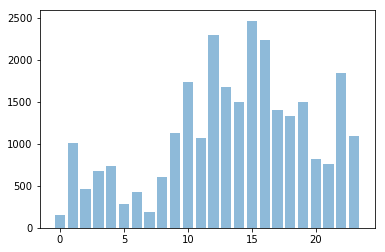

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(hours, avg_processing_seconds, align='center', alpha=0.5)
plt.show()

(array([ 2.,  2.,  2.,  5.,  7.,  4.,  1.,  0.,  0.,  1.]),
 array([  71. ,   97.9,  124.8,  151.7,  178.6,  205.5,  232.4,  259.3,
         286.2,  313.1,  340. ]),
 <a list of 10 Patch objects>)

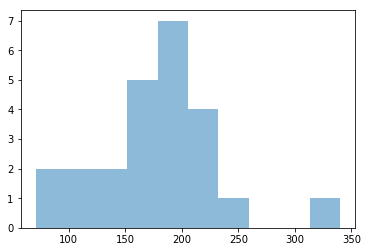

In [64]:
plt.hist(hour_counts,alpha=0.5)

Slightly normal distribution

<h3>Put everything into a function</h3>
<h4>This way, we can easily test other similar datasets

In [67]:
def get_hour_bucket_averages(filename):
    import datetime

    def get_data(filename):
        data = list()
        
        with open(filename,'r') as f:
            for line in f:
                data.append(line.strip().split(','))
        data = [(datetime.datetime.strptime(x[0],"%Y-%m-%d %H:%M:%S").hour, float(x[1])) for x in data]
        return data
    
    buckets = dict()
    
    for i in get_data(filename):
        if i[0] in buckets:
            buckets[i[0]][0] += 1
            buckets[i[0]][1] += i[1]
        else:
            buckets[i[0]] = [1,i[1]]  
    return [(k, v[1]/v[0]) for k,v in buckets.items()]

In [68]:
get_hour_bucket_averages('nyc.csv')

[(0, 0.6570511564469035),
 (1, 2.9613477328431377),
 (2, 2.334965452261305),
 (3, 3.0839338759007866),
 (4, 4.663183017810805),
 (5, 2.550054976851854),
 (6, 5.344349826388891),
 (7, 2.5844597678664565),
 (8, 6.0724520669659565),
 (9, 8.564869090207626),
 (10, 12.671294691132733),
 (11, 5.901653566341063),
 (12, 13.66402543540564),
 (13, 8.593492462013293),
 (14, 8.100135135135135),
 (15, 12.776634463154863),
 (16, 10.943701434277418),
 (17, 6.634365784623489),
 (18, 7.324956692612944),
 (19, 9.098796085858586),
 (20, 5.199433822667603),
 (21, 4.74319171267541),
 (22, 8.449229102956167),
 (23, 5.184938602292768)]

<h3>The file all_data.csv contains data from January to September 2016</h3>
<h4>We can test whether our one day result is generally true or not</h4>

In [2]:
get_hour_bucket_averages('all_data.csv')

[(0, 4.485612099128487),
 (1, 2.8263083049680278),
 (2, 2.859209391496003),
 (3, 2.9813212672915657),
 (4, 3.520777693173893),
 (5, 4.028842839550067),
 (6, 5.3501635819789914),
 (7, 4.505984716000046),
 (8, 5.090230597495249),
 (9, 6.767684356105564),
 (10, 7.252764762298842),
 (11, 7.156706204701707),
 (12, 7.422673351052525),
 (13, 7.402425948682307),
 (14, 7.546603227374128),
 (15, 8.001251635520441),
 (16, 8.191847429766709),
 (17, 7.275740883284791),
 (18, 6.464817194100053),
 (19, 5.6403138675375155),
 (20, 4.989414785443646),
 (21, 4.275270320395889),
 (22, 3.5846441619204086),
 (23, 3.0346464768596855)]

In [70]:
t1 = datetime.datetime.now().time()
t2 =  datetime.timedelta(seconds=5)
t1+t2

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'